# FOR GOOGLE COLAB

# Download the repo


In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 450kB 24.8MB/s 
     |████████████████████████████████| 3.8MB 36.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=79f19e580b720ca5571b7c62a8c4e3929e766b3379061f787880f62b31c0e0a1
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [2]:
!git clone https://github.com/krishshah99615/Single-Hand-Gesture

Cloning into 'Single-Hand-Gesture'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 273 (delta 2), reused 8 (delta 2), pack-reused 263
Receiving objects: 100% (273/273), 63.54 MiB | 11.85 MiB/s, done.
Resolving deltas: 100% (25/25), done.


# Load all Library and funtions

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Input,GlobalAveragePooling2D
import numpy as np
import os

## Set the parameters

In [4]:
DATA_DIR="Single-Hand-Gesture/Dataset/"
TARGET_SIZE=(224,224)
BATCH_SIZE=32
VALIDATION_SPLIT=0.3
EPOCHS=100
NUM_CLASSES=3

## SET the images and preprocessing 

In [5]:
train_data_gen = ImageDataGenerator(validation_split=VALIDATION_SPLIT,
                                    rescale=1./255)

train_gen = train_data_gen.flow_from_directory(DATA_DIR,
                                               target_size=TARGET_SIZE,
                                               class_mode='categorical',
                                               shuffle=True,
                                              subset='training')

val_gen = train_data_gen.flow_from_directory(DATA_DIR,
                                               target_size=TARGET_SIZE,
                                               class_mode='categorical',
                                                subset='validation')

Found 112 images belonging to 3 classes.
Found 46 images belonging to 3 classes.


## Use preprocess model

In [6]:
vgg16_model =VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation = 'softmax')(x)
model = Model(inputs = vgg16_model.input, outputs = predictions)
for layer in vgg16_model.layers:
    layer.trainable = False
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

58892288/58889256 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

## Training

In [7]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#Early Stopping
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')
#CReating a log file of training
csv= tf.keras.callbacks.CSVLogger('logfile.csv')
#Terminate if Nan Occurs
term_nan=tf.keras.callbacks.TerminateOnNaN() 
#Learning Rate Sceduler
    
history = model.fit_generator(train_gen,epochs=EPOCHS,validation_data=val_gen,shuffle=True,callbacks=[early,checkpoint,csv,term_nan])

Epoch 1/100
3/4 [=====================>........] - ETA: 6s - loss: 4.5212 - accuracy: 0.2875 
Epoch 00001: val_accuracy improved from -inf to 0.34783, saving model to model.h5
4/4 [==============================] - 23s 6s/step - loss: 3.5869 - accuracy: 0.2768 - val_loss: 1.0529 - val_accuracy: 0.3478
Epoch 2/100
3/4 [=====================>........] - ETA: 0s - loss: 1.0771 - accuracy: 0.3375
Epoch 00002: val_accuracy did not improve from 0.34783
4/4 [==============================] - 5s 1s/step - loss: 1.0566 - accuracy: 0.3304 - val_loss: 1.0660 - val_accuracy: 0.3261
Epoch 3/100
3/4 [=====================>........] - ETA: 0s - loss: 1.0379 - accuracy: 0.3625
Epoch 00003: val_accuracy improved from 0.34783 to 0.65217, saving model to model.h5
4/4 [==============================] - 5s 1s/step - loss: 1.0370 - accuracy: 0.3304 - val_loss: 1.0880 - val_accuracy: 0.6522
Epoch 4/100
3/4 [=====================>........] - ETA: 0s - loss: 0.8277 - accuracy: 0.8750
Epoch 00004: val_accuracy 

## Visualize 

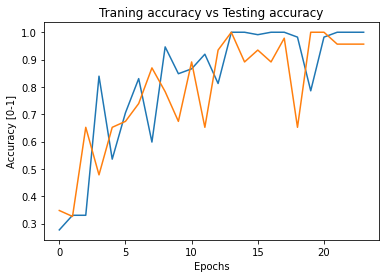

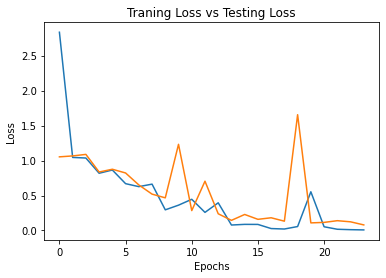

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Traning accuracy vs Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy [0-1]')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Traning Loss vs Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss ')
plt.show()
model.load_weights('model.h5')
model.save('model.h5')

In [9]:
train_gen.class_indices

{'Shikhara': 0, 'Simhamukha': 1, 'Trishula': 2}

## Evaluation

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report


valid_gen = val_gen
m=model
res=tf.keras.Sequential.evaluate_generator(m,valid_gen)
scores = m.predict_generator(valid_gen)


print('Total Images : '+str(len(valid_gen.filenames)))
print("Test Loss : "+str(round(res[0],4)))
print("Test Accuracy : "+str(round(res[1]*100,4))+"%")

y_pred = np.argmax(scores, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(valid_gen.classes, y_pred)
print(cm)
print('Classification Report')
target_names = ['Shikhara', 'Simhamukha','Trishula']
print(classification_report(valid_gen.classes, y_pred, target_names=target_names))

Total Images : 46
Test Loss : 0.1601
Test Accuracy : 100.0%
Confusion Matrix
[[7 4 4]
 [3 6 7]
 [5 6 4]]
Classification Report
              precision    recall  f1-score   support

    Shikhara       0.47      0.47      0.47        15
  Simhamukha       0.38      0.38      0.38        16
    Trishula       0.27      0.27      0.27        15

    accuracy                           0.37        46
   macro avg       0.37      0.37      0.37        46
weighted avg       0.37      0.37      0.37        46



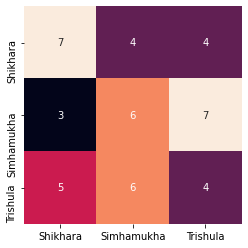

In [13]:
import seaborn as sns
sns.heatmap(cm , square=True,cbar=False ,annot=True , xticklabels=target_names,yticklabels=target_names)